In [170]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

### Not necessary to start with a `np` array

Real-world situations may start with `np`,  
and then we convert to tensors.


In [188]:
# Prepare sine training data
x_np = np.linspace(0, 5 * np.pi, 300)
y_np = np.sin(x_np)

### Always plot your Raw Data to get a sense of what it looks like
Is it linear? Curvy? Noisy? Piecewise?

Helps guide model complexity and activation choices.

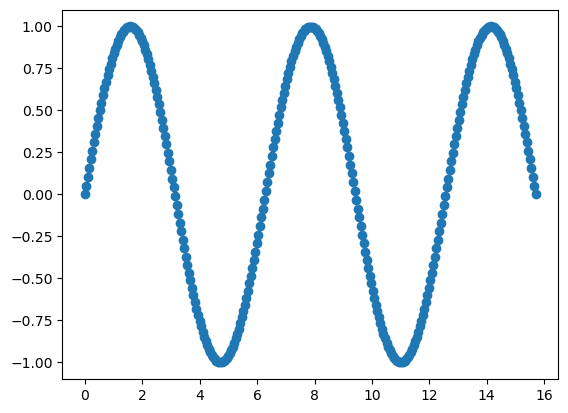

In [189]:
plt.scatter(x_np, y_np)

### Then convert to PyTorch tensors.
Add `.unsqueeze(1)` if needed (ML models expect 2D input).

Normalize if data ranges are far apart:
`x = (x - x.mean()) / x.std()`


In [190]:
x_data = torch.from_numpy(x_np).float().unsqueeze(1)  # shape: (5, 1)
y_data = torch.from_numpy(y_np).float().unsqueeze(1)  # shape: (5, 1)

In [191]:
print(x_data.T)  # used T to write values horizontally and save vertical space

tensor([[ 0.0000,  0.0525,  0.1051,  0.1576,  0.2101,  0.2627,  0.3152,  0.3677,
          0.4203,  0.4728,  0.5253,  0.5779,  0.6304,  0.6830,  0.7355,  0.7880,
          0.8406,  0.8931,  0.9456,  0.9982,  1.0507,  1.1032,  1.1558,  1.2083,
          1.2608,  1.3134,  1.3659,  1.4184,  1.4710,  1.5235,  1.5760,  1.6286,
          1.6811,  1.7337,  1.7862,  1.8387,  1.8913,  1.9438,  1.9963,  2.0489,
          2.1014,  2.1539,  2.2065,  2.2590,  2.3115,  2.3641,  2.4166,  2.4691,
          2.5217,  2.5742,  2.6267,  2.6793,  2.7318,  2.7844,  2.8369,  2.8894,
          2.9420,  2.9945,  3.0470,  3.0996,  3.1521,  3.2046,  3.2572,  3.3097,
          3.3622,  3.4148,  3.4673,  3.5198,  3.5724,  3.6249,  3.6774,  3.7300,
          3.7825,  3.8351,  3.8876,  3.9401,  3.9927,  4.0452,  4.0977,  4.1503,
          4.2028,  4.2553,  4.3079,  4.3604,  4.4129,  4.4655,  4.5180,  4.5705,
          4.6231,  4.6756,  4.7281,  4.7807,  4.8332,  4.8858,  4.9383,  4.9908,
          5.0434,  5.0959,  

### Define a Model That Fits the Shape
Tanh/Sigmoid for curves

ReLU for piecewise or sharp breaks

Match complexity to pattern — not too deep unless necessary



In [192]:
# Define network: 2 hidden layers with ReLU activations
# Use a slightly bigger model — sine waves require more nuance than mostly-linear dataset:
# Try 16 or 32 neurons per layer instead of 4

model = nn.Sequential(
    nn.Linear(1, 16),   # Input → Hidden Layer 1
    nn.Tanh(),
    nn.Linear(16, 16),   # Hidden Layer 1 → Hidden Layer 2
    nn.Tanh(),
    nn.Linear(16, 1)    # Hidden Layer 2 → Output
)

Let's display the `model` object and verify.  
There's also the `help(model)` that will  
Help on Sequential in module `torch.nn.modules.container` object

In [193]:
model

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Tanh()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

In [194]:
# 3. Loss and optimizer
criterion = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.05)

In [195]:
criterion

MSELoss()

In [196]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.05
    maximize: False
    weight_decay: 0
)

In [201]:
# 4. Training loop
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x_data)              # Forward pass
    loss = criterion(y_pred, y_data)    # Compute loss

    optimizer.zero_grad()               # Zero gradients
    loss.backward()                     # Backward pass (autograd)
    optimizer.step()                    # Update parameters

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:3d}: Loss = {loss.item():.6f}")

Epoch 100: Loss = 0.013523
Epoch 200: Loss = 0.009425
Epoch 300: Loss = 0.003803
Epoch 400: Loss = 0.005278
Epoch 500: Loss = 0.000466
Epoch 600: Loss = 0.004114
Epoch 700: Loss = 0.006525
Epoch 800: Loss = 0.001055
Epoch 900: Loss = 0.000360
Epoch 1000: Loss = 0.002670
Epoch 1100: Loss = 0.005203
Epoch 1200: Loss = 0.003237
Epoch 1300: Loss = 0.000780
Epoch 1400: Loss = 0.002307
Epoch 1500: Loss = 0.001130
Epoch 1600: Loss = 0.001730
Epoch 1700: Loss = 0.006007
Epoch 1800: Loss = 0.000443
Epoch 1900: Loss = 0.000256
Epoch 2000: Loss = 0.000250


In [202]:
# 5. Final predictions
final_preds = model(x_data).detach()  # Detach to stop tracking gradients

print("\n=== Final Predictions ===")
for x, pred, target in zip(x_data, final_preds, y_data):
    print(f"x={x.item():.1f} → Predicted: {pred.item():.4f}, Target: {target.item():.4f}, Error: {pred.item() - target.item():.4f}")


=== Final Predictions ===
x=0.0 → Predicted: 0.0065, Target: 0.0000, Error: 0.0065
x=0.1 → Predicted: 0.0529, Target: 0.0525, Error: 0.0004
x=0.1 → Predicted: 0.1039, Target: 0.1049, Error: -0.0009
x=0.2 → Predicted: 0.1573, Target: 0.1570, Error: 0.0004
x=0.2 → Predicted: 0.2111, Target: 0.2086, Error: 0.0025
x=0.3 → Predicted: 0.2638, Target: 0.2597, Error: 0.0041
x=0.3 → Predicted: 0.3149, Target: 0.3100, Error: 0.0048
x=0.4 → Predicted: 0.3642, Target: 0.3595, Error: 0.0047
x=0.4 → Predicted: 0.4119, Target: 0.4080, Error: 0.0038
x=0.5 → Predicted: 0.4581, Target: 0.4554, Error: 0.0027
x=0.5 → Predicted: 0.5029, Target: 0.5015, Error: 0.0014
x=0.6 → Predicted: 0.5465, Target: 0.5463, Error: 0.0003
x=0.6 → Predicted: 0.5890, Target: 0.5895, Error: -0.0005
x=0.7 → Predicted: 0.6301, Target: 0.6311, Error: -0.0010
x=0.7 → Predicted: 0.6699, Target: 0.6710, Error: -0.0010
x=0.8 → Predicted: 0.7083, Target: 0.7090, Error: -0.0007
x=0.8 → Predicted: 0.7449, Target: 0.7450, Error: -0.000

### What you’re seeing above after x=11.6 is classic extrapolation decay
The model was trained on:  
* `x_np = np.linspace(0, 4 * np.pi, N)`  

...which ends at approximately: 4π ≈ 12.566

You're now asking it to predict on:
* `x = 11.6 to 12.6`


  

In [203]:
#list(model.parameters())

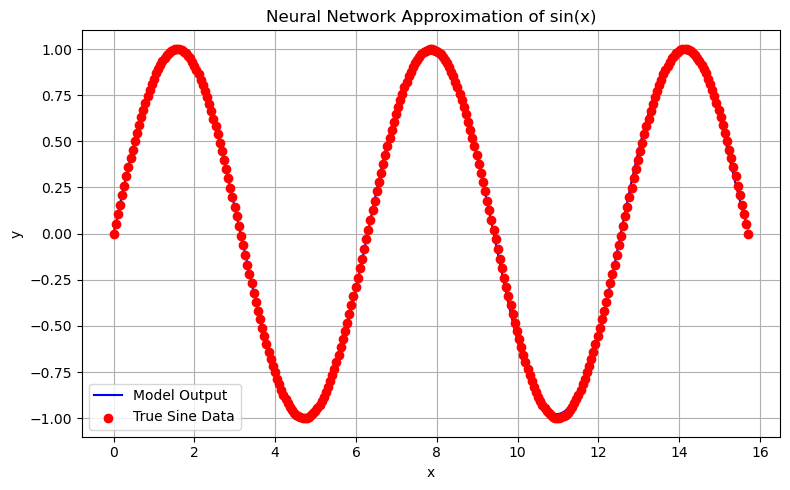

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Extended x range for smooth sine visualization
x_range_np = np.linspace(0, 5 * np.pi, 300)
x_range = torch.from_numpy(x_range_np).float().unsqueeze(1)

# 2. Predict using the trained model
y_range = model(x_range).detach().numpy()

# 3. Plot predictions vs actual sine
plt.figure(figsize=(8, 5))
plt.plot(x_range_np, y_range, label='Model Output', color='blue')
plt.scatter(x_np, y_np, color='red', label='True Sine Data', zorder=5)
plt.title("Neural Network Approximation of sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



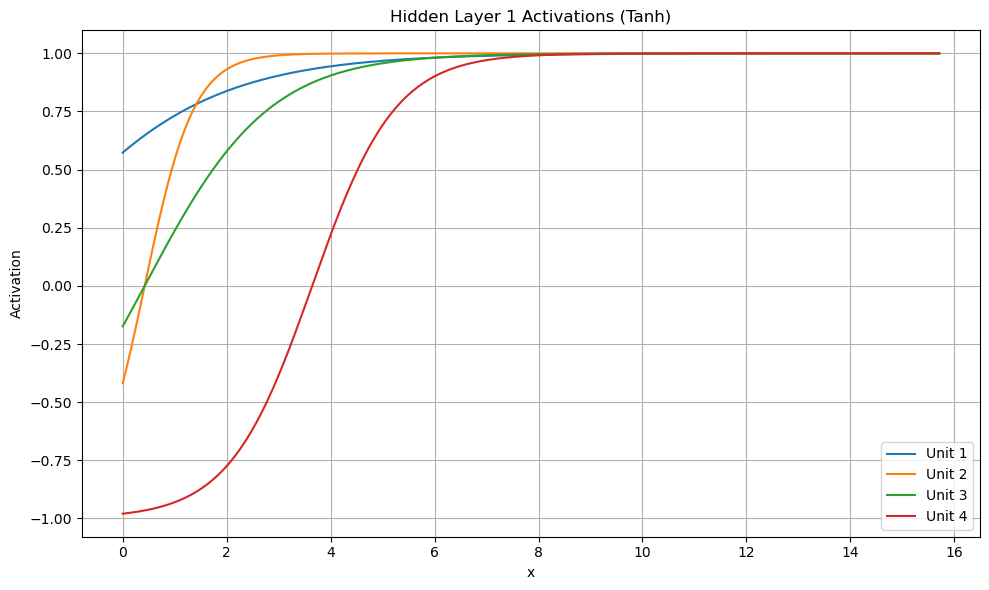

In [205]:
with torch.no_grad():
    z1 = model[0](x_range)   # Linear(1, 16)
    a1 = model[1](z1)        # Tanh → activation of first hidden layer
    z2 = model[2](a1)
    a2 = model[3](z2)

# Plot all or some of the 16 hidden unit activations
plt.figure(figsize=(10, 6))
for i in range(4):  # Try 4 first to keep it readable
    plt.plot(x_range_np, a1[:, i], label=f"Unit {i+1}")

plt.title("Hidden Layer 1 Activations (Tanh)")
plt.xlabel("x")
plt.ylabel("Activation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

